In [2]:
import pyfor
import matplotlib.pyplot as plt

## Normalization

One of the most integral parts of LiDAR analysis is normalizing the point cloud. This is done first by filtering ground points using one of many algorithms. **pyfor** currently implements the progressive morphological ground filter (Zhang et al. 2003) to achieve this.

There are two ways to handle normalization. The first is to normalize the Cloud object. This will normalize the point cloud **in place**. We will soon see that this is just a wrapper for the lower level Grid functions.

In [18]:
# Load the point cloud
pc = pyfor.cloud.Cloud("my_las.las")

# Plot the raw cloud
pc.iplot3d(point_size=2)

<img src="images/raw_iplot.png" width="550">

In [13]:
# Call the normalization functions with some useful settings for the algorithm.
pc.normalize(cell_size=0.4, num_windows=7, dh_0= 1, dh_max=2.5)

<img src="images/norm_iplot.png" width="550">

As we can see, the point cloud is now normalized and ready for metric extraction.

## Bare Earth Model (BEM)

Sometimes it is advantageous to view the bare earth model by itself as its own object. This way, we can diagnose the performance of our normalization routine, and save the BEM to its own file for other uses. This can be done via the lower-level `Grid` object.

In [26]:
# Load the point cloud
pc = pyfor.cloud.Cloud("/home/bryce/Desktop/pyfor_test_data/stand_102_tiles/PC_039.las")

# Create a grid
pc_grid = pc.grid(0.5)

# Set ground filtering parameters
bem = pc_grid.ground_filter(num_windows = 7, dh_max = 2.5, dh_0 = 1)

Calling `.ground_filter` on a `Grid` object returns a `Raster` object, complete with its own plotting and writing function. We can now easily diagnose our ground filter and adjust our parameters as needed.

In [16]:
bem.iplot3d()

<img src="images/bem.png" width="400">

`Raster` objects have many useful features. For advanced users, we can access the numpy array of values where each element of the array corresponds to the `z` value in our BEM.

In [22]:
bem.array


array([[ 549.65,  549.65,  549.65, ...,  445.1 ,  445.1 ,  445.1 ],
       [ 549.65,  549.65,  549.65, ...,  445.1 ,  445.1 ,  445.1 ],
       [ 549.65,  549.65,  549.65, ...,  445.1 ,  445.1 ,  445.1 ],
       ..., 
       [ 411.17,  411.17,  411.17, ...,  458.25,  458.25,  458.25],
       [ 411.17,  411.17,  411.17, ...,  458.25,  458.25,  458.25],
       [ 411.17,  411.17,  411.17, ...,  458.25,  458.25,  458.25]])

We also have our usual 2D plot at our disposal.

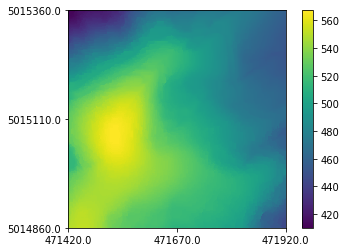

In [27]:
bem.plot()

Finally, if we have a coordinate reference system set to the "parent" `Cloud` object, we can save the file.

In [30]:
import pyproj
pc.crs = pyproj.Proj("+init=EPSG:4326").srs
bem.write("my_bem.tif")